In [1]:
pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy torch

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-n3lbx0t_
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-n3lbx0t_
  Resolved https://github.com/huggingface/diffusers.git to commit 9135e54e768a59ddcf8ad18818d2ffe69ea3a32a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.3 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.22.0.d

In [2]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

# use Stable Diffusion v2
model_id = "stabilityai/stable-diffusion-2"

# noise sheduler
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
# load model and weights
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:268: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2 via `revision='fp16'`. This behavior is deprecated and will be removed in diffusers v1. One should use `variant='fp16'` instead. However, it appears that stabilityai/stable-diffusion-2 currently does not have the required variant filenames in the 'main' branch. 
 The Diffusers team and community would be very grateful if you could open an issue: https://github.com/huggingface/diffusers/issues/new with the title 'stabilityai/stable-diffusion-2 is missing fp16 files' so that the correct variant file can be added.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

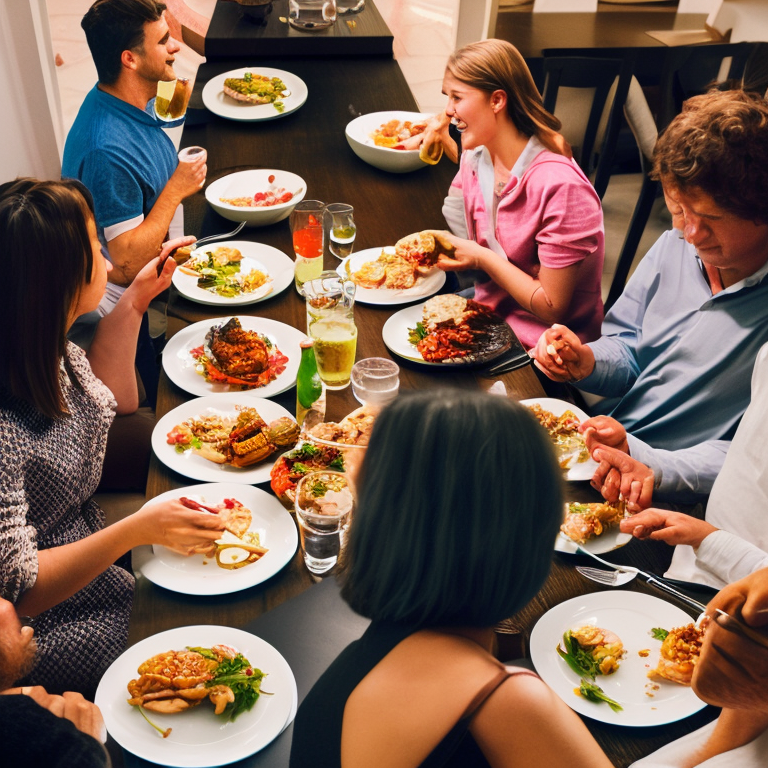

In [7]:
# input text
text = "people eating dinner"
image = pipe(text).images[0]
image

In [4]:
print(pipe)

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.22.0.dev0",
  "_name_or_path": "stabilityai/stable-diffusion-2",
  "feature_extractor": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



  0%|          | 0/50 [00:00<?, ?it/s]

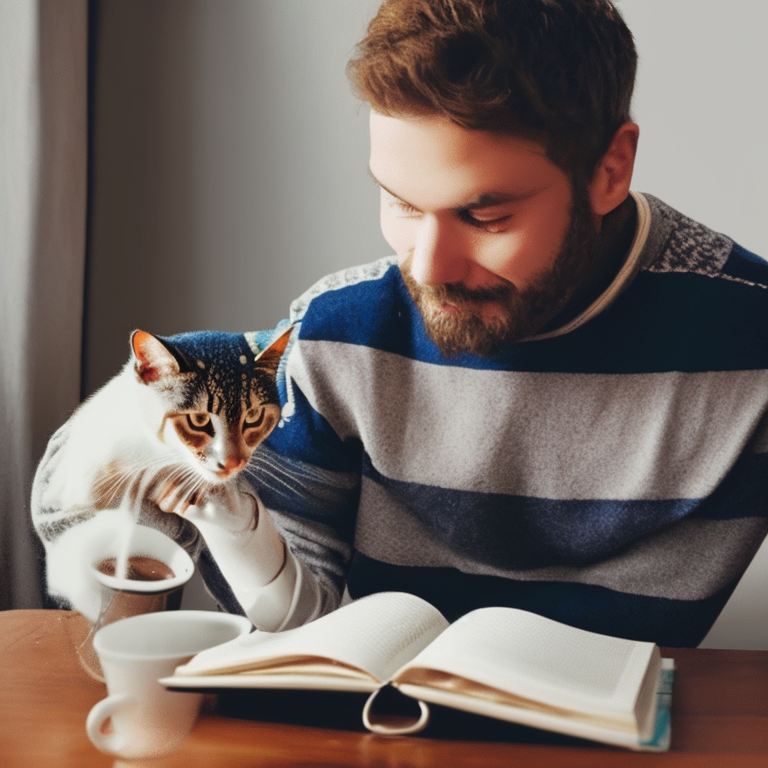

In [7]:
text_2 = "a man drinking coffee while reading book with a cat"
image_2 = pipe(text_2).images[0]
image_2

  0%|          | 0/50 [00:00<?, ?it/s]

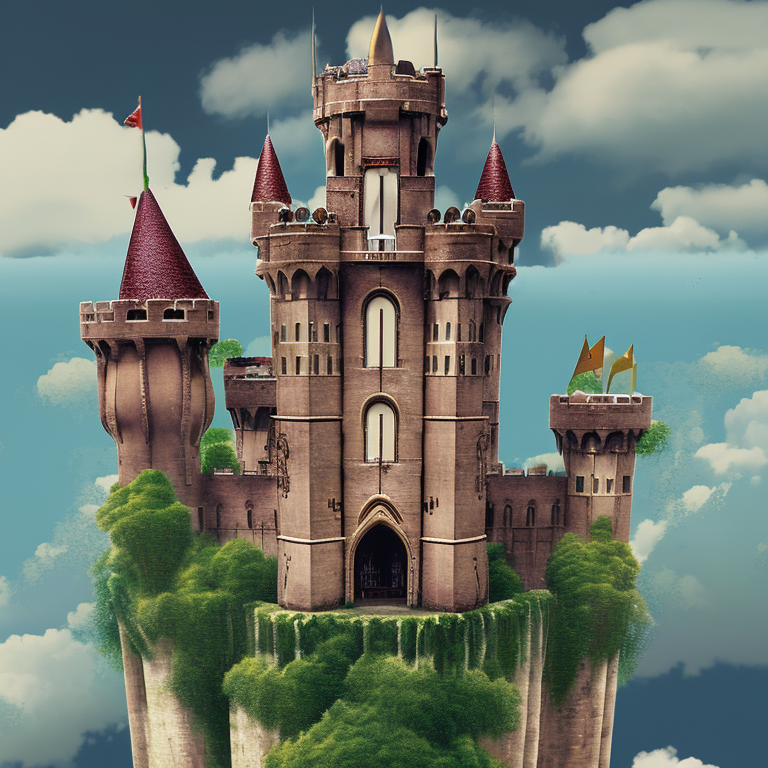

In [3]:
text_3 = "a castle in the sky"
image_3 = pipe(text_3).images[0]
image_3

In [5]:
text_4 = "historical buildings"
image_4 = pipe(text_4).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

'historical buildings'

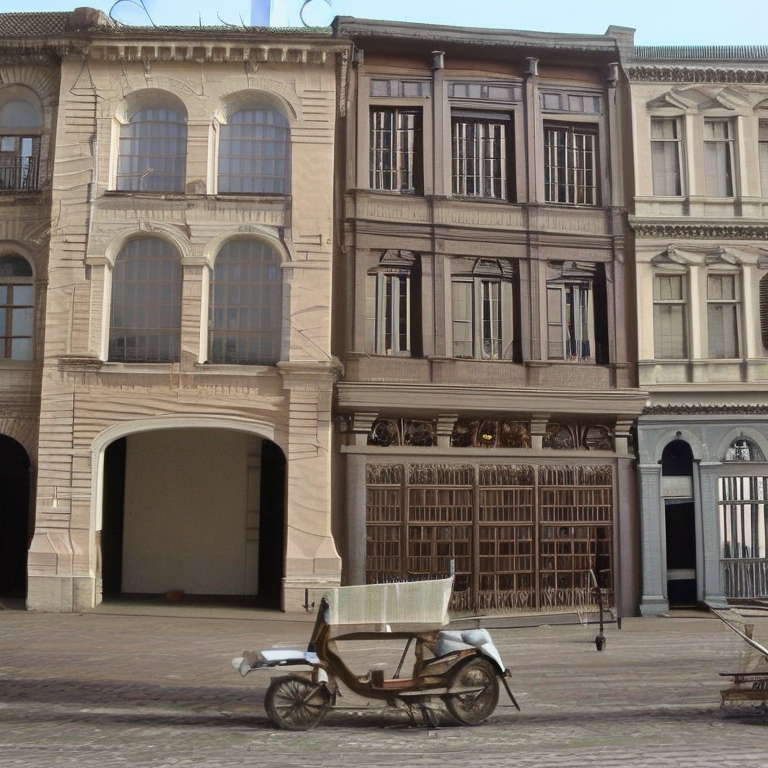

In [6]:
image_4